# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbaz0012\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "soir", "rue", "tél", 
       "bruxelles", "prix", "app", "ecr", "maison", "ans", "brux", "bon", "agence", 
       "louer", "francs", "très", "avenue", "grand", "marché", "cherche", "vend", 
       "chaussée", "occasion", "vendre", "cours", "meubles", "libre", "ecrire", "villa", 
       "cuis", "conf", "mod", "mois", "part", "bel", "garage", "vis", "voiture", 
       "nouvelle", "Liège","Waterloo", "vente", "juin", "téléph", "adr", "meub", "frs", 
       "louise", "Ixelles", "Uccle", "LIBRE", "Libre", "jard", "JARD", "gar", "GAR", 
       "APPART", "appart", "Appart", "heures", "état", "place", "lib", "neuf", "terr", 
       "beau", "chauff", "demande", "bonne", "pièces", "rez", "samedi", "etc", "parc", 
       "juillet", "PET", "grande", "peu", "toute", "avant", "nord", "centre", "pers",
       "ETAT", "jours", "belle", "midi", "mer", "près", "Anvers", "jardin", "porte", 
       "Liège","dimanche", "pet", "temps", "pays", "jour", "Etat", "ANVERS", "leurs",
       "Belgique", "terrain", "Saint", "quart", "quelques", "lieu", "Paris", "partie",
       "sal", "Porte", "inst", "Mai", "jeudi", "Août", "mardi", "prés", "cuisine", 
       "matin", "Renault", "hôtel", "cave", "travaux", "crédit", "faç", "eau", "chamb", 
       "Charleroi", "vue", "anvers", "belgique", "BELGIQUE", "SAINT", "saint", "UCCLE",
       "uccle", "paris", "PARIS", "MAI","août", "dés", "vie", "lundi", "petit", "France", 
       "dame", "situation", "rapport", "ceux", "aven", "max", "MAX", "tour", "ach", "ACH",
       "mai", "Mai", "France", "service", "année", "devant", "Liège", "MIN", "min", "Mons", 
       "suite", "fois", "car", "cour", "bois", "chf", "CHF", "confort", "chez", "point", 
       "pens", "première", "vers", "ordre", "dès", "jeune", "salle", "travail", "gros", 
       "celui", "comm", "COMM", "cent", "toujours", "tel", "TEL", "minute", "env", "ENV", 
       "bourse", "français", "déjà", "Namur", "trav", "TRAV", "bureau", "pierre", "enfants", 
       "enf", "ENF", "sit", "SIT", "WATERLOO", "lux", "LUX", "elles", "gare", "Gare", "mars", 
       "Mars", "bas", "ford", "Ford", "dernier", "monde", "chambre", "auto", "radio", "alors", 
       "com", "COM", "Charleroi", "cher", "homme", "nouveau", "rien", "étage", "jeu", "art", 
       "grd", "GRD", "IXELLES", "voir", "seul", "pension", "janvier", "Janvier", "mme", "MME", 
       "hommes", "mat", "MAT", "voit", "offre", "OFFRE", "femme", "rapp", "RAPP", "moment", 
       "commerce", "moderne", "bain"
       ]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1951

In [4]:
# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'JEUDI 4 JANVIER 1951 LE SOIR 9 LES THEATRES Monnaie : Jeudi 4, à 20 h., « Le Jongleur de Notre-Dame » et « Bonsoir M. Pantalon ». Parc : Jeudi, en matinée et en soirée, spectacle littéraire : « L’Eper'

In [9]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [10]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'JEUDI 4 JANVIER 1951 LE SOIR 9 LES THEATRES Monnaie : Jeudi 4, à 20 h., « Le Jongleur de Notre-Dame » et « Bonsoir M. Pantalon ». Parc : Jeudi, en matinée et en soirée, spectacle littéraire : « L’Epervler *, de Francis Croisset, avec Charles Gontler, Marthe Dugard. etc. Galeries : A partir de jeudi, les galas Karsenty, présentent « La soif », de Bernstein, avec Aimé Clariond. Vaudeville : Hâtez-vous d’aller applaudir le succès du moment : « Aux cocus réunis ». On annonce les dernières. Albambra '

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [11]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [12]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1951_clean.txt!'

In [13]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'THEATRES MONNAIE JONGLEUR BONSOIR PANTALON MATINÉE SOIRÉE SPECTACLE LITTÉRAIRE EPERVLER FRANCIS CROISSET CHARLES GONTLER MARTHE DUGARD GALERIES PARTIR GALAS KARSENTY PRÉSENTENT SOIF BERNSTEIN AIMÉ CLARIOND VAUDEVILLE HÂTEZ ALLER APPLAUDIR SUCCÈS COCUS RÉUNIS ANNONCE DERNIÈRES ALBAMBRA DERNIÈRE OPÉRETTE SOURIRE VENDREDI PRINCESSE CZARDAS VAMP JAMAIS NINE HOUTAIN CONTRIBUE LARGEMENT SUCCÈS MAIN PASSE MOLIÈRE JACQUELINE SCHAUTEN GEORGES JAMIN TRIOMPHENT IMMENSE SUCCÈS RIRE AMANTS TERRIBLES GAÏTÉ TR'

## Nuage de mots

### Afficher les termes les plus fréquents


In [14]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('BELGE', 316), ('ETAT', 312), ('GÉNÉRAL', 290), ('GUERRE', 285), ('MINISTRE', 274), ('LOI', 264), ('PRÉSIDENT', 236), ('FIN', 234), ('FRANCE', 231), ('PREMIER', 226), ('LIÈGE', 219), ('MONS', 218), ('JEAN', 209), ('GOUVERNEMENT', 196), ('NAMUR', 187), ('CONGO', 183), ('WATERLOO', 182), ('CONSEIL', 181), ('ROYALE', 180), ('MILLIONS', 173), ('CHARLEROI', 172), ('IXELLES', 165), ('CHEF', 163), ('ROI', 162), ('POLITIQUE', 157), ('GAZ', 156), ('PETITE', 156), ('PLUSIEURS', 156), ('REPRISE', 156), ('RENAULT', 156), ('BEAUX', 155), ('DÉFENSE', 155), ('RÉFÉR', 155), ('SEPT', 154), ('SUP', 153), ('SCHAERBEEK', 152), ('QUATRE', 151), ('CAUSE', 149), ('LONG', 149), ('MANS', 149), ('ETATS', 149), ('COND', 149), ('SUISSE', 148), ('MERCREDI', 148), ('BELGES', 148), ('IMPORTANTE', 148), ('DACTYLO', 147), ('ROUTE', 147), ('RÉF', 147), ('FILLE', 146), ('FILM', 146), ('FORT', 146), ('TROP', 146), ('ÂGE', 146), ('PARTIR', 145), ('DEMI', 145), ('LUXE', 145), ('DIVISION', 145), ('HUI', 144), ('UNION', 14

### Créer, stocker et afficher le nuage de mots

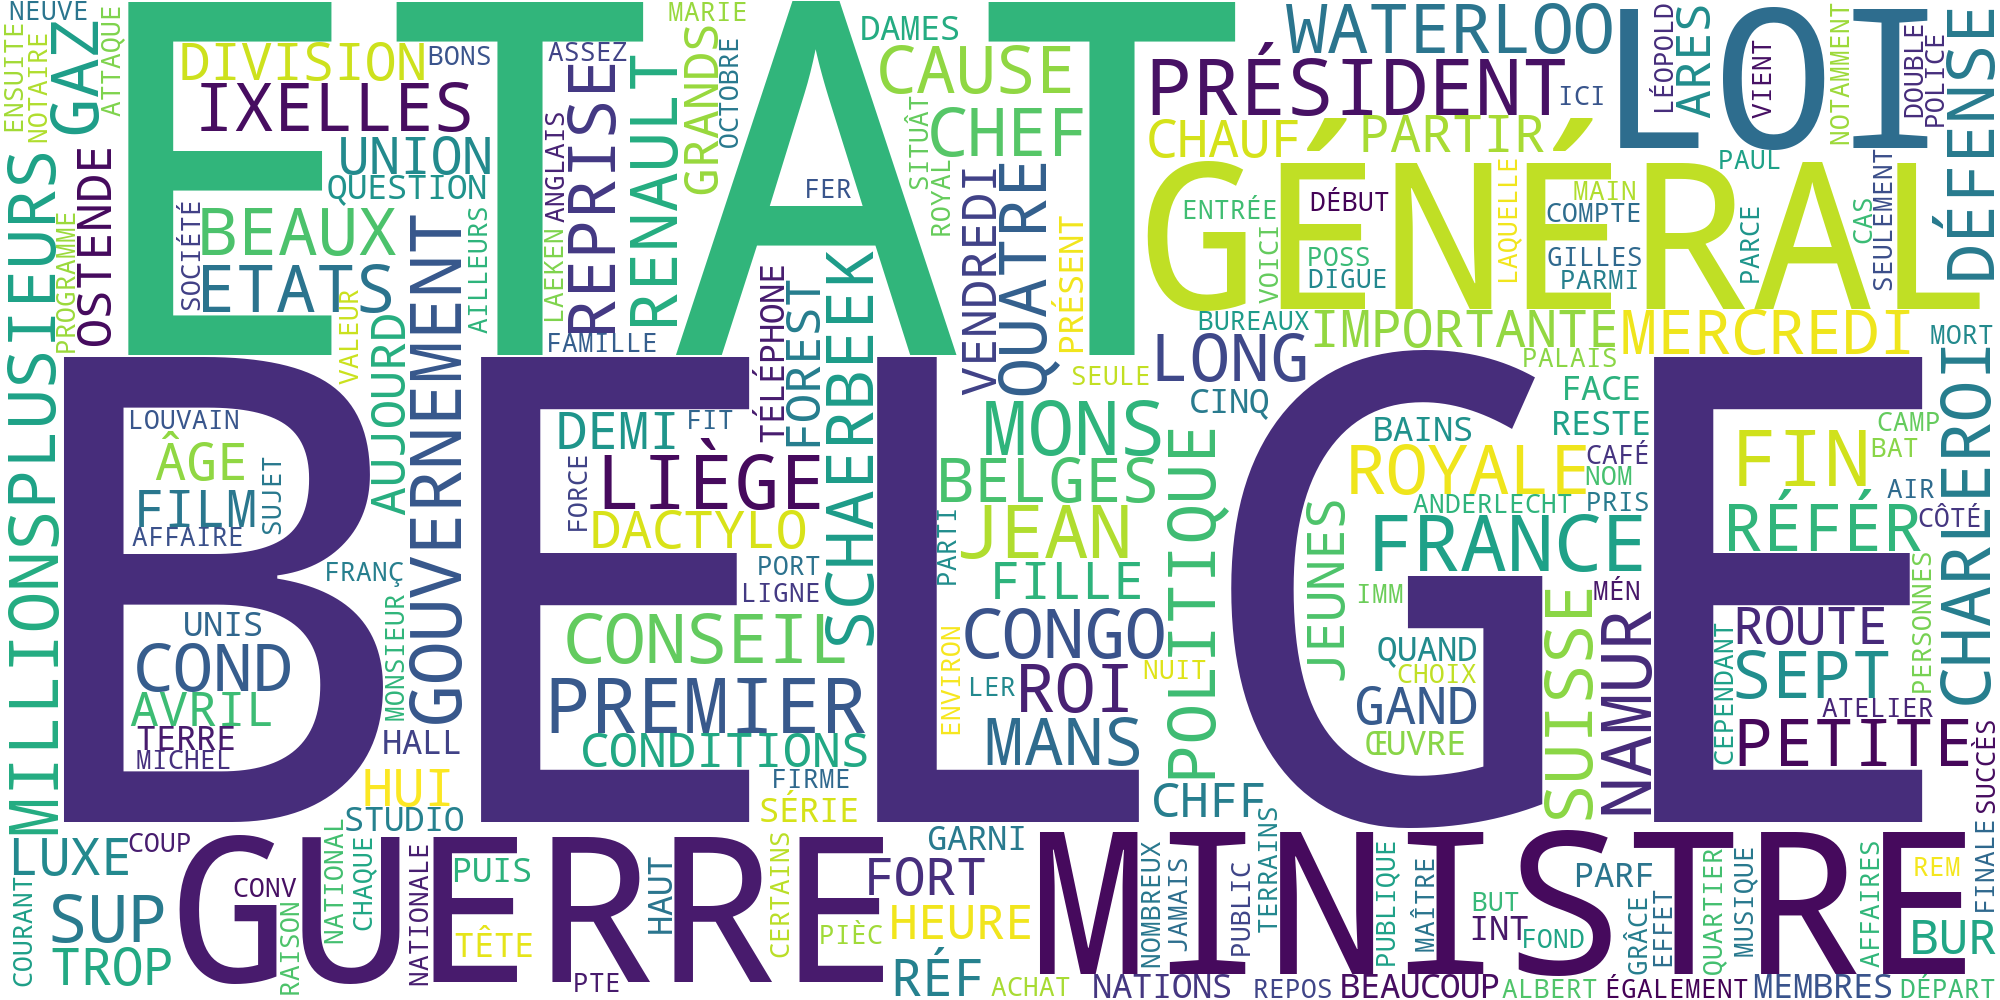

In [ ]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))